In [1]:
import pandas as pd
import os
import glob
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import glob
import pandas as pd

folder_path = '/content/drive/My Drive/reviews of all models'

file_pattern = os.path.join(folder_path, '*.csv')
all_csv_files = glob.glob(file_pattern)

all_dfs_list = []
print(f"--- Found {len(all_csv_files)} starting to process... ---")

for filename in all_csv_files:
    try:
        df = pd.read_csv(filename)
        #(e.g., 'iphone_12_pro.csv') to readable model name ('iphone 12 pro')
        model_name = os.path.basename(filename).replace('.csv', '').replace('_', ' ')
        df['model'] = model_name
        all_dfs_list.append(df)
        print(f"Processed {os.path.basename(filename)}")
    except Exception as e:
        print(f"An error occurred with {os.path.basename(filename)}: {e}")

if all_dfs_list:
    # Concatenate all DataFrames into one
    merged_df = pd.concat(all_dfs_list, ignore_index=True)

    print("\n" + "="*50)
    print("--- All files have been successfully merged! ---")

    # Show summary of merged dataset
    print(f"\nFinal dataset contains {merged_df.shape[0]} reviews from {len(all_dfs_list)} files.")
    print("First 5 rows:")
    print(merged_df.head())

    # Save merged data to a new CSV
    output_filename = 'merged_reviews.csv'
    merged_df.to_csv(output_filename, index=False)

    print(f"\nMerged data saved to '{output_filename}' in your Colab session.")
    print("You can now download this file from the file pane on the left.")
else:
    print("\nNo CSV files were found or processed. Please check the folder path and ensure it contains CSV files.")


--- Found 17 starting to process... ---
Processed iphone_12.csv
Processed iphone_12_mini.csv
Processed iphone_12_pro.csv
Processed iphone_12_pro_max.csv
Processed iphone_13.csv
Processed iphone_13_pro.csv
Processed iphone_13_mini.csv
Processed iphone_13_pro_max.csv
Processed iphone_14.csv
Processed iphone_14_plus.csv
Processed iphone_14_pro.csv
Processed iphone_14_pro_max.csv
Processed iphone_15.csv
Processed iphone_15_plus.csv
Processed iphone_15_pro.csv
Processed iphone_15_pro_max.csv
Processed iphone_se_3rd_gen.csv

--- All files have been successfully merged! ---

Final dataset contains 6129 reviews from 17 files.
First 5 rows:
         country  countryCode        date  filterByKeyword filterByRating  \
0  United States          NaN  2025-05-30              NaN        oneStar   
1  United States          NaN  2025-02-10              NaN        oneStar   
2  United States          NaN  2025-06-21              NaN        oneStar   
3  United States          NaN  2024-11-15           

In [3]:
df=pd.read_csv( '/content/merged_reviews.csv')
df.head()

,country,countryCode,date,filterByKeyword,filterByRating,input,isAmazonVine,isVerified,position,product/listPrice,...,variantAttributes/1/key,variantAttributes/1/value,variantAttributes/2/key,variantAttributes/2/value,variantAttributes/3/key,variantAttributes/3/value,model,reviewImages/9,reviewImages/10,reviewImages/11
0,United States,NaN,2025-05-30,NaN,oneStar,https://www.amazon.com/Apple-iPhone-12-64GB-Bl...,False,True,1,NaN,...,Color,White,Service Provider,Unlocked,Product grade,Renewed,iphone 12,NaN,NaN,NaN
1,United States,NaN,2025-02-10,NaN,oneStar,https://www.amazon.com/Apple-iPhone-12-64GB-Bl...,False,True,2,NaN,...,Color,Black,Service Provider,Unlocked,Product grade,Renewed,iphone 12,NaN,NaN,NaN
2,United States,NaN,2025-06-21,NaN,oneStar,https://www.amazon.com/Apple-iPhone-12-64GB-Bl...,False,True,3,NaN,...,Color,Blue,Service Provider,Unlocked,Product grade,Renewed,iphone 12,NaN,NaN,NaN
3,United States,NaN,2024-11-15,NaN,oneStar,https://www.amazon.com/Apple-iPhone-12-64GB-Bl...,False,True,4,NaN,...,Color,Blue,Service Provider,Unlocked,Product grade,Renewed,iphone 12,NaN,NaN,NaN
4,United States,NaN,2025-06-19,NaN,oneStar,https://www.amazon.com/Apple-iPhone-12-64GB-Bl...,False,True,5,NaN,...,Color,Blue,Service Provider,Unlocked,Product grade,Renewed,iphone 12,NaN,NaN,NaN


In [4]:
df.columns


Index(['country', 'countryCode', 'date', 'filterByKeyword', 'filterByRating',
       'input', 'isAmazonVine', 'isVerified', 'position', 'product/listPrice',
       'product/price', 'productAsin', 'productOriginalAsin', 'ratingScore',
       'reviewCategoryUrl', 'reviewDescription', 'reviewId', 'reviewImages/0',
       'reviewImages/1', 'reviewImages/2', 'reviewImages/3', 'reviewImages/4',
       'reviewImages/5', 'reviewImages/6', 'reviewImages/7', 'reviewImages/8',
       'reviewReaction', 'reviewTitle', 'reviewUrl', 'reviewedIn',
       'totalCategoryRatings', 'totalCategoryReviews', 'userId',
       'userProfileLink', 'variant', 'variantAsin', 'variantAttributes/0/key',
       'variantAttributes/0/value', 'variantAttributes/1/key',
       'variantAttributes/1/value', 'variantAttributes/2/key',
       'variantAttributes/2/value', 'variantAttributes/3/key',
       'variantAttributes/3/value', 'model', 'reviewImages/9',
       'reviewImages/10', 'reviewImages/11'],
      dtype='object'

In [5]:
df.shape

(6129, 48)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6129 entries, 0 to 6128
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    6129 non-null   object 
 1   countryCode                0 non-null      float64
 2   date                       6129 non-null   object 
 3   filterByKeyword            0 non-null      float64
 4   filterByRating             6129 non-null   object 
 5   input                      6129 non-null   object 
 6   isAmazonVine               6129 non-null   bool   
 7   isVerified                 6129 non-null   bool   
 8   position                   6129 non-null   int64  
 9   product/listPrice          0 non-null      float64
 10  product/price              0 non-null      float64
 11  productAsin                6129 non-null   object 
 12  productOriginalAsin        6129 non-null   object 
 13  ratingScore                6129 non-null   int64

In [7]:
df['model'].value_counts()

,count
model,
iphone 12,400
iphone 12 pro,400
iphone 12 pro max,400
iphone 13,400
iphone 13 pro,400
iphone 13 pro max,400
iphone 13 mini,400
iphone 14,400
iphone 14 pro,400


In [8]:
df['input']

,input
0,https://www.amazon.com/Apple-iPhone-12-64GB-Bl...
1,https://www.amazon.com/Apple-iPhone-12-64GB-Bl...
2,https://www.amazon.com/Apple-iPhone-12-64GB-Bl...
3,https://www.amazon.com/Apple-iPhone-12-64GB-Bl...
4,https://www.amazon.com/Apple-iPhone-12-64GB-Bl...
...,...
6124,https://www.amazon.com/Apple-iPhone-SE-3rd-Mid...
6125,https://www.amazon.com/Apple-iPhone-SE-3rd-Mid...
6126,https://www.amazon.com/Apple-iPhone-SE-3rd-Mid...
6127,https://www.amazon.com/Apple-iPhone-SE-3rd-Mid...


In [9]:
df['isAmazonVine']

,isAmazonVine
0,False
1,False
2,False
3,False
4,False
...,...
6124,False
6125,False
6126,False
6127,False


In [10]:
df['position']

,position
0,1
1,2
2,3
3,4
4,5
...,...
6124,96
6125,97
6126,98
6127,99


In [11]:
df['reviewReaction']

,reviewReaction
0,8.0
1,12.0
2,2.0
3,9.0
4,NaN
...,...
6124,NaN
6125,NaN
6126,NaN
6127,NaN


In [12]:
new_df = df[[
    'model',
    'ratingScore',
    'reviewTitle',
    'reviewDescription',
    'date',
]].copy()
print(new_df.head())

       model  ratingScore                                        reviewTitle  \
0  iphone 12            1                                    Defective Phone   
1  iphone 12            1  POOR CUSTOMER SERVICE AND DEFECTIVE PHONE WITH...   
2  iphone 12            1  Selling a damaged iPhone as "in excellent cond...   
3  iphone 12            1            Not what I expected for “Good” quality.   
4  iphone 12            1        Horrible glitches horrible customer service   

                                   reviewDescription        date  
0  I never leave Amazon reviews but I felt it was...  2025-05-30  
1  I recently purchased Renewed iphone 12 from SY...  2025-02-10  
2  This is the 6th USED iPhone that I have purcha...  2025-06-21  
3  I ordered this iPhone when my old phone broke....  2024-11-15  
4  Please do not get a phone from this company. T...  2025-06-19  


In [13]:
new_df.shape

(6129, 5)

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6129 entries, 0 to 6128
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   model              6129 non-null   object
 1   ratingScore        6129 non-null   int64 
 2   reviewTitle        6128 non-null   object
 3   reviewDescription  6118 non-null   object
 4   date               6129 non-null   object
dtypes: int64(1), object(4)
memory usage: 239.5+ KB


In [15]:
new_df['date'] = pd.to_datetime(new_df['date'])

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6129 entries, 0 to 6128
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   model              6129 non-null   object        
 1   ratingScore        6129 non-null   int64         
 2   reviewTitle        6128 non-null   object        
 3   reviewDescription  6118 non-null   object        
 4   date               6129 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 239.5+ KB


In [17]:
new_df['reviewDescription'] = new_df['reviewDescription'].fillna('  ')

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6129 entries, 0 to 6128
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   model              6129 non-null   object        
 1   ratingScore        6129 non-null   int64         
 2   reviewTitle        6128 non-null   object        
 3   reviewDescription  6129 non-null   object        
 4   date               6129 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 239.5+ KB


In [19]:

!pip install langdetect googletrans==4.0.0-rc1


from langdetect import detect, LangDetectException
from googletrans import Translator
from tqdm.notebook import tqdm
import pandas as pd

# --- Create the combined text column ---
new_df['full_review_text'] = new_df['reviewTitle'].astype(str) + ". " + new_df['reviewDescription'].astype(str)

# --- Define the language detection function ---
def is_spanish(text):
    try:
        return detect(text) == 'es'
    except LangDetectException:
        return False

# --- Identify Spanish reviews ---
print("Detecting language for each review...")
tqdm.pandas(desc="Language Detection")
is_spanish_series = new_df['full_review_text'].progress_apply(is_spanish)
spanish_indices = is_spanish_series[is_spanish_series == True].index
print(f" Found {len(spanish_indices)} Spanish reviews to translate.")

# --- Translate and overwrite in the same column ---
translator = Translator()

# Loop only through the reviews identified as Spanish
for i in tqdm(spanish_indices, desc="Translating Spanish Reviews"):
    try:
        original_text = new_df.loc[i, 'full_review_text']
        translated_text = translator.translate(original_text, src='es', dest='en').text
        # Overwrite the original text with the translation
        new_df.loc[i, 'full_review_text'] = translated_text
    except Exception as e:
        print(f"Could not translate row {i}: {e}")

print("\n In-place translation complete.")
print("\n--- DataFrame with Updated 'full_review_text' Column ---")
print(new_df[['full_review_text']].head())

Detecting language for each review...


Language Detection:   0%|          | 0/6129 [00:00<?, ?it/s]

 Found 590 Spanish reviews to translate.


Translating Spanish Reviews:   0%|          | 0/590 [00:00<?, ?it/s]

Could not translate row 3259: 'Translator' object has no attribute 'raise_Exception'
Could not translate row 3519: 'Translator' object has no attribute 'raise_Exception'
Could not translate row 3573: 'Translator' object has no attribute 'raise_Exception'
Could not translate row 3691: 'Translator' object has no attribute 'raise_Exception'
Could not translate row 3761: 'Translator' object has no attribute 'raise_Exception'
Could not translate row 3829: 'Translator' object has no attribute 'raise_Exception'
Could not translate row 4036: 'Translator' object has no attribute 'raise_Exception'
Could not translate row 4252: 'Translator' object has no attribute 'raise_Exception'
Could not translate row 4382: 'Translator' object has no attribute 'raise_Exception'
Could not translate row 4399: 'Translator' object has no attribute 'raise_Exception'
Could not translate row 4619: 'Translator' object has no attribute 'raise_Exception'

 In-place translation complete.

--- DataFrame with Updated 'ful

In [20]:
from transformers import pipeline
from tqdm import tqdm #this is just to track progress
tqdm.pandas()

sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT e

In [21]:
new_df['full_review_text']

,full_review_text
0,Defective Phone. I never leave Amazon reviews ...
1,POOR CUSTOMER SERVICE AND DEFECTIVE PHONE WITH...
2,"Selling a damaged iPhone as ""in excellent cond..."
3,Not what I expected for “Good” quality.. I ord...
4,Horrible glitches horrible customer service. P...
...,...
6124,Battery under 79%. It was a good price but the...
6125,86% battery health. There’s some scratches aro...
6126,Battery health already “significantly degraded...
6127,Low battery health. Not bad for a refurb. Ever...


In [22]:
def get_sentiment(text):
    try:
        truncated_text = ' '.join(str(text).split()[:510])
        result = sentiment_pipeline(truncated_text)[0]
        if result['label'] == 'Positive':
            return 1
        elif result['label'] == 'Neutral':
            return 0
        else:
            return -1
    except Exception:
        return 0

new_df['sentiment_score'] = new_df['full_review_text'].progress_apply(get_sentiment)

100%|██████████| 6129/6129 [01:35<00:00, 64.49it/s]


In [23]:
negative_sentiment_count = new_df[new_df['sentiment_score'] == -1].shape[0]

In [24]:
print(negative_sentiment_count)

6113


In [25]:
!pip install transformers torch
!pip install gensim nltk

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [26]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [27]:
# adding some custom stop words that are common in phone reviews but not very informative
custom_stop_words = ['phone', 'iphone', 'apple', 'amazon', 'product', 'get', 'one',
                     'would', 'like', 'bought', 'buy', 'also', 'issue', 'problem']

stop_words.update(custom_stop_words)

In [28]:
new_df.shape

(6129, 7)

In [29]:
new_df.columns

Index(['model', 'ratingScore', 'reviewTitle', 'reviewDescription', 'date',
       'full_review_text', 'sentiment_score'],
      dtype='object')

In [30]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    processed_tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and len(word) > 2
    ]
    return processed_tokens

new_df['processed_text'] = new_df['full_review_text'].apply(preprocess_text)

print("Text preprocessing complete.")
print(new_df[['full_review_text', 'processed_text']].head())

Text preprocessing complete.
                                    full_review_text  \
0  Defective Phone. I never leave Amazon reviews ...   
1  POOR CUSTOMER SERVICE AND DEFECTIVE PHONE WITH...   
2  Selling a damaged iPhone as "in excellent cond...   
3  Not what I expected for “Good” quality.. I ord...   
4  Horrible glitches horrible customer service. P...   

                                      processed_text  
0  [defective, never, leave, review, felt, necess...  
1  [poor, customer, service, defective, without, ...  
2  [selling, damaged, excellent, condition, used,...  
3  [expected, good, quality, ordered, old, broke,...  
4  [horrible, glitch, horrible, customer, service...  


In [31]:
new_df['processed_text']

,processed_text
0,"[defective, never, leave, review, felt, necess..."
1,"[poor, customer, service, defective, without, ..."
2,"[selling, damaged, excellent, condition, used,..."
3,"[expected, good, quality, ordered, old, broke,..."
4,"[horrible, glitch, horrible, customer, service..."
...,...
6124,"[battery, good, price, battery, replace, spend..."
6125,"[battery, health, there, scratch, around, lens..."
6126,"[battery, health, already, significantly, degr..."
6127,"[low, battery, health, bad, refurb, everything..."


In [32]:
from gensim.models.phrases import Phrases, Phraser

tokenized_reviews = new_df['processed_text'].tolist()

phrases = Phrases(tokenized_reviews, min_count=5, threshold=10)
bigram_phraser = Phraser(phrases)

new_df.loc[:, 'processed_text_bigrams'] = new_df['processed_text'].apply(lambda tokens: bigram_phraser[tokens])
print("--- Example of bigram creation ---")
print(new_df[['processed_text', 'processed_text_bigrams']].head())


--- Example of bigram creation ---
                                      processed_text  \
0  [defective, never, leave, review, felt, necess...   
1  [poor, customer, service, defective, without, ...   
2  [selling, damaged, excellent, condition, used,...   
3  [expected, good, quality, ordered, old, broke,...   
4  [horrible, glitch, horrible, customer, service...   

                              processed_text_bigrams  
0  [defective, never, leave, review, felt, necess...  
1  [poor_customer, service, defective, without, r...  
2  [selling, damaged, excellent_condition, used, ...  
3  [expected, good, quality, ordered, old, broke,...  
4  [horrible, glitch, horrible, customer_service,...  


In [33]:
from gensim import corpora

processed_docs = new_df['processed_text_bigrams'].tolist()

dictionary = corpora.Dictionary(processed_docs)

dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

print(f"Created a dictionary with {len(dictionary)} unique words.")
print(f"Created a corpus with {len(corpus)} documents.")

Created a dictionary with 1617 unique words.
Created a corpus with 6129 documents.


Finding Optimal Topics:   0%|          | 0/14 [00:00<?, ?it/s]

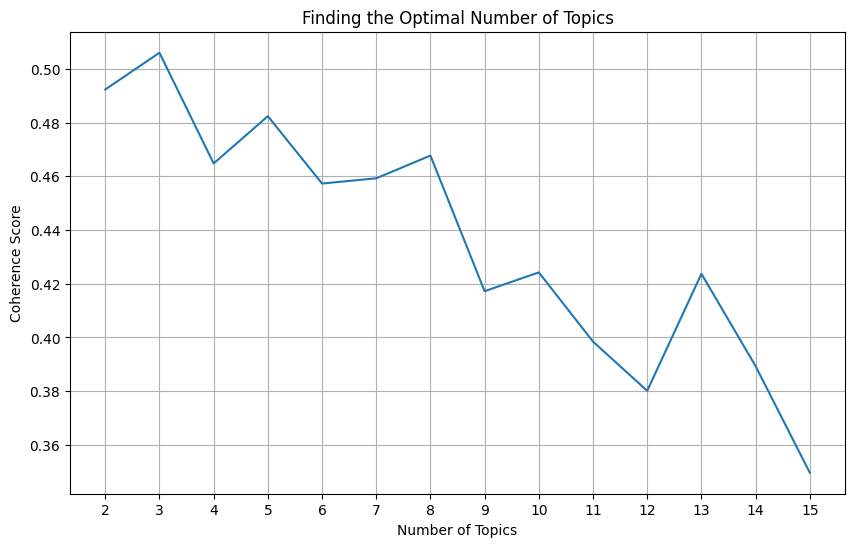

In [34]:
import matplotlib.pyplot as plt
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from tqdm.notebook import tqdm

def find_optimal_topics(dictionary, corpus, texts, limit=16):
    coherence_values = []
    model_list = []

    for num_topics in tqdm(range(2, limit), desc="Finding Optimal Topics"):
        model = LdaMulticore(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=100,
            chunksize=100,
            passes=10,
            per_word_topics=True
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model,
            texts=texts,
            dictionary=dictionary,
            coherence='c_v'
        )
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = find_optimal_topics(
    dictionary=dictionary,
    corpus=corpus,
    texts=new_df['processed_text_bigrams'].tolist(),
    limit=16
)

x = range(2, 16)
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Finding the Optimal Number of Topics")
plt.xticks(x)
plt.grid(True)
plt.show()

In [35]:
import gensim
from gensim.models import CoherenceModel
from pprint import pprint
from tqdm.notebook import tqdm

lda_model_4_topics = gensim.models.LdaMulticore(
    corpus=corpus, id2word=dictionary, num_topics=4,
    random_state=100, chunksize=100, passes=20
)

lda_model_6_topics = gensim.models.LdaMulticore(
    corpus=corpus, id2word=dictionary, num_topics=6,
    random_state=100, chunksize=100, passes=20
)

print("Models trained successfully.")

coherence_4 = CoherenceModel(
    model=lda_model_4_topics,
    texts=new_df['processed_text_bigrams'],
    dictionary=dictionary,
    coherence='c_v'
).get_coherence()

coherence_6 = CoherenceModel(
    model=lda_model_6_topics,
    texts=new_df['processed_text_bigrams'],
    dictionary=dictionary,
    coherence='c_v'
).get_coherence()

print("\nModel Coherence Scores")
print(f"4 Topics: {coherence_4:.4f}")
print(f"6 Topics: {coherence_6:.4f}")

def assign_topics(lda_model, corpus):
    return [max(prob_dist, key=lambda item: item[1])[0]
            for prob_dist in tqdm(lda_model[corpus], desc=f"Assigning {lda_model.num_topics} Topics")]

new_df['topic_4'] = assign_topics(lda_model_4_topics, corpus)
new_df['topic_6'] = assign_topics(lda_model_6_topics, corpus)

print("\nTopic labels assigned.")

print("\nTopics from 4-Topic Model")
pprint(lda_model_4_topics.print_topics())

print("\nTopics from 6-Topic Model")
pprint(lda_model_6_topics.print_topics())

print("\nSample with Topic Labels")
print(new_df[['full_review_text', 'topic_4', 'topic_6']].head())

Models trained successfully.

Model Coherence Scores
4 Topics: 0.4628
6 Topics: 0.4695


Assigning 4 Topics:   0%|          | 0/6129 [00:00<?, ?it/s]

Assigning 6 Topics:   0%|          | 0/6129 [00:00<?, ?it/s]


Topic labels assigned.

Topics from 4-Topic Model
[(0,
  '0.111*"battery" + 0.025*"new" + 0.022*"charger" + 0.022*"good" + '
  '0.020*"battery_health" + 0.016*"battery_life" + 0.015*"refurbished" + '
  '0.014*"bad" + 0.012*"cable" + 0.012*"original"'),
 (1,
  '0.019*"seller" + 0.019*"return" + 0.011*"device" + 0.011*"unlocked" + '
  '0.011*"received" + 0.010*"said" + 0.010*"refund" + 0.009*"could" + '
  '0.009*"returned" + 0.009*"verizon"'),
 (2,
  '0.044*"screen" + 0.036*"good" + 0.036*"condition" + 0.033*"scratch" + '
  '0.029*"excellent_condition" + 0.023*"excellent" + 0.020*"came" + '
  '0.017*"great" + 0.016*"battery_health" + 0.009*"screen_protector"'),
 (3,
  '0.027*"screen" + 0.017*"work" + 0.012*"camera" + 0.009*"great" + '
  '0.009*"issue" + 0.009*"got" + 0.008*"time" + 0.008*"even" + 0.008*"use" + '
  '0.007*"dont"')]

Topics from 6-Topic Model
[(0,
  '0.039*"seller" + 0.032*"phone" + 0.031*"locked" + 0.030*"device" + '
  '0.019*"sold" + 0.017*"unlocked" + 0.014*"renewed" +

In [36]:
import gensim
from gensim.models import CoherenceModel
from pprint import pprint
from tqdm.notebook import tqdm

# Train models
lda_model_2_topics = gensim.models.LdaMulticore(
    corpus=corpus, id2word=dictionary, num_topics=2,
    random_state=100, chunksize=100, passes=20
)

lda_model_3_topics = gensim.models.LdaMulticore(
    corpus=corpus, id2word=dictionary, num_topics=3,
    random_state=100, chunksize=100, passes=20
)

lda_model_5_topics = gensim.models.LdaMulticore(
    corpus=corpus, id2word=dictionary, num_topics=5,
    random_state=100, chunksize=100, passes=20
)

print("Models trained successfully.")

# Coherence scores
coherence_2 = CoherenceModel(
    model=lda_model_2_topics,
    texts=new_df['processed_text_bigrams'],
    dictionary=dictionary,
    coherence='c_v'
).get_coherence()

coherence_3 = CoherenceModel(
    model=lda_model_3_topics,
    texts=new_df['processed_text_bigrams'],
    dictionary=dictionary,
    coherence='c_v'
).get_coherence()

coherence_5 = CoherenceModel(
    model=lda_model_5_topics,
    texts=new_df['processed_text_bigrams'],
    dictionary=dictionary,
    coherence='c_v'
).get_coherence()

print("\nModel Coherence Scores")
print(f"2 Topics: {coherence_2:.4f}")
print(f"3 Topics: {coherence_3:.4f}")
print(f"5 Topics: {coherence_5:.4f}")

def assign_topics(lda_model, corpus):
    return [max(prob_dist, key=lambda item: item[1])[0]
            for prob_dist in tqdm(lda_model[corpus], desc=f"Assigning {lda_model.num_topics} Topics")]

# Assign topic labels
new_df['topic_2'] = assign_topics(lda_model_2_topics, corpus)
new_df['topic_3'] = assign_topics(lda_model_3_topics, corpus)
new_df['topic_5'] = assign_topics(lda_model_5_topics, corpus)

print("\nTopic labels assigned.")

# Output topic summaries
print("\nTopics from 2-Topic Model")
pprint(lda_model_2_topics.print_topics())

print("\nTopics from 3-Topic Model")
pprint(lda_model_3_topics.print_topics())

print("\nTopics from 5-Topic Model")
pprint(lda_model_5_topics.print_topics())

print("\nSample with Topic Labels")
print(new_df[['full_review_text', 'topic_2', 'topic_3', 'topic_5']].head())

Models trained successfully.

Model Coherence Scores
2 Topics: 0.5037
3 Topics: 0.4983
5 Topics: 0.4994


Assigning 2 Topics:   0%|          | 0/6129 [00:00<?, ?it/s]

Assigning 3 Topics:   0%|          | 0/6129 [00:00<?, ?it/s]

Assigning 5 Topics:   0%|          | 0/6129 [00:00<?, ?it/s]


Topic labels assigned.

Topics from 2-Topic Model
[(0,
  '0.035*"battery" + 0.032*"screen" + 0.031*"good" + 0.020*"condition" + '
  '0.018*"scratch" + 0.016*"excellent_condition" + 0.015*"great" + '
  '0.015*"came" + 0.015*"battery_health" + 0.013*"excellent"'),
 (1,
  '0.013*"return" + 0.013*"seller" + 0.009*"work" + 0.007*"day" + '
  '0.007*"device" + 0.007*"use" + 0.007*"screen" + 0.007*"time" + '
  '0.007*"unlocked" + 0.006*"received"')]

Topics from 3-Topic Model
[(0,
  '0.027*"screen" + 0.024*"battery" + 0.013*"work" + 0.010*"camera" + '
  '0.009*"charge" + 0.009*"use" + 0.009*"refurbished" + 0.008*"new" + '
  '0.008*"day" + 0.008*"time"'),
 (1,
  '0.019*"seller" + 0.018*"return" + 0.010*"device" + 0.010*"unlocked" + '
  '0.010*"received" + 0.009*"said" + 0.009*"refund" + 0.009*"could" + '
  '0.008*"returned" + 0.008*"verizon"'),
 (2,
  '0.036*"good" + 0.030*"screen" + 0.027*"condition" + 0.027*"battery" + '
  '0.025*"scratch" + 0.022*"excellent_condition" + 0.020*"battery_healt

In [37]:
final_topic_map = {
    0: 'Seller & Carrier Unlockability',
    1: 'Phone Functionality & Defects',
    2: 'Screen & Cosmetic Condition',
    3: 'Battery Life & Charging'
}

new_df['final_topic'] = new_df['topic_4'].map(final_topic_map)

print("--- DataFrame with Final, Descriptive Topic Labels ---")
print(new_df[['full_review_text', 'final_topic']].head(20))

--- DataFrame with Final, Descriptive Topic Labels ---
                                     full_review_text  \
0   Defective Phone. I never leave Amazon reviews ...   
1   POOR CUSTOMER SERVICE AND DEFECTIVE PHONE WITH...   
2   Selling a damaged iPhone as "in excellent cond...   
3   Not what I expected for “Good” quality.. I ord...   
4   Horrible glitches horrible customer service. P...   
5   DON'T BUY THIS, FAM! 3-MONTH WARRANTY ON PURPO...   
6   Shady- do not recommend buying a phone here. V...   
7   Phone broke after a day.. The phone was great ...   
8   Read before purchasing!!. Short version: they ...   
9   Bad battery from the start!. This product came...   
10  Paid for excellent this phone is anything but....   
11  The Phone i was sold was broken.. I bought thi...   
12  Amazon Cares Little About Supporting Students....   
13  DO NOT purchase unless you ENJOY DEFECTIVE PHO...   
14  AVOID THIS SELLER! Refurbished iPhone Nightmar...   
15  Bad quality item, had to retu

In [38]:
final_topic_distribution = new_df['final_topic'].value_counts(normalize=True) * 100

print("\n--- Final Distribution of Complaint Topics ---")
print(final_topic_distribution)


--- Final Distribution of Complaint Topics ---
final_topic
Screen & Cosmetic Condition       36.123348
Battery Life & Charging           26.839615
Phone Functionality & Defects     23.625388
Seller & Carrier Unlockability    13.411650
Name: proportion, dtype: float64


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-40-1012785264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_topic_distribution.values, y=final_topic_distribution.index, palette='viridis')


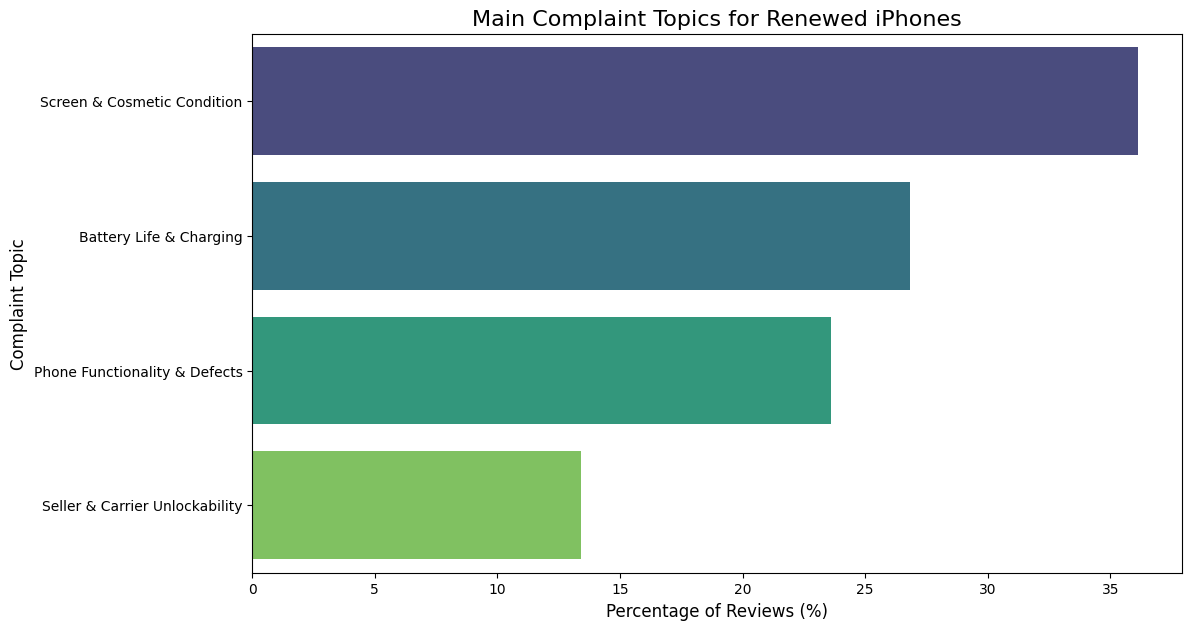

In [40]:
plt.figure(figsize=(12, 7))
sns.barplot(x=final_topic_distribution.values, y=final_topic_distribution.index, palette='viridis')

plt.title('Main Complaint Topics for Renewed iPhones', fontsize=16)
plt.xlabel('Percentage of Reviews (%)', fontsize=12)
plt.ylabel('Complaint Topic', fontsize=12)
plt.show()

In [41]:
print(new_df.columns.tolist())

['model', 'ratingScore', 'reviewTitle', 'reviewDescription', 'date', 'full_review_text', 'sentiment_score', 'processed_text', 'processed_text_bigrams', 'topic_4', 'topic_6', 'topic_2', 'topic_3', 'topic_5', 'final_topic']


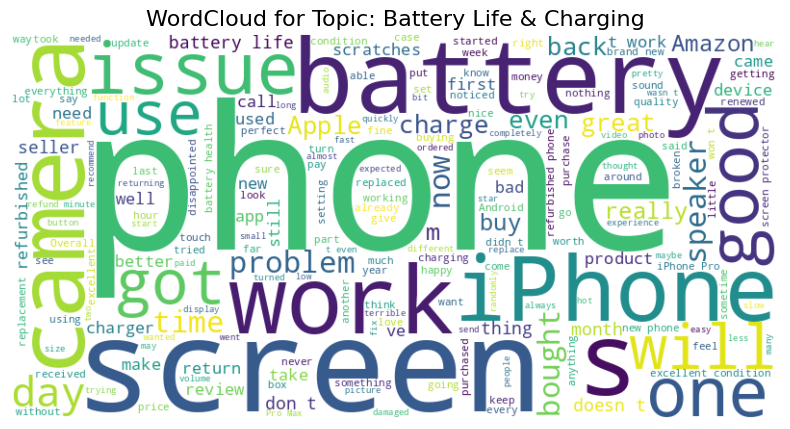

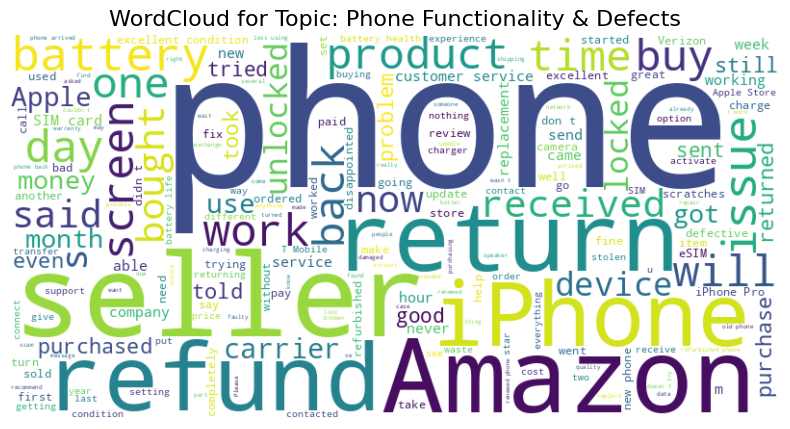

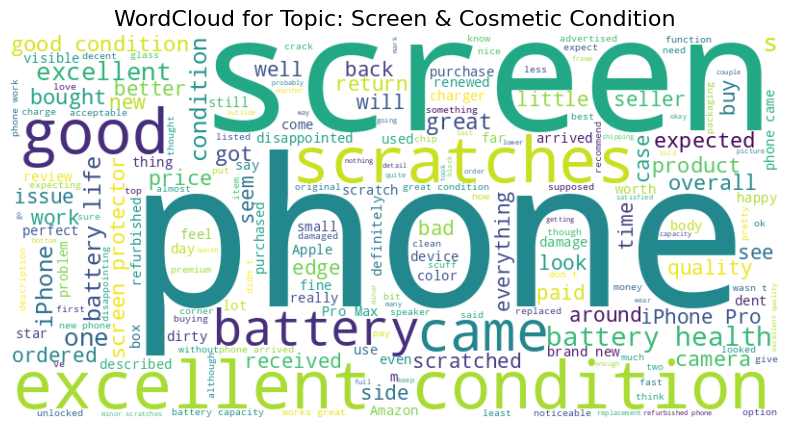

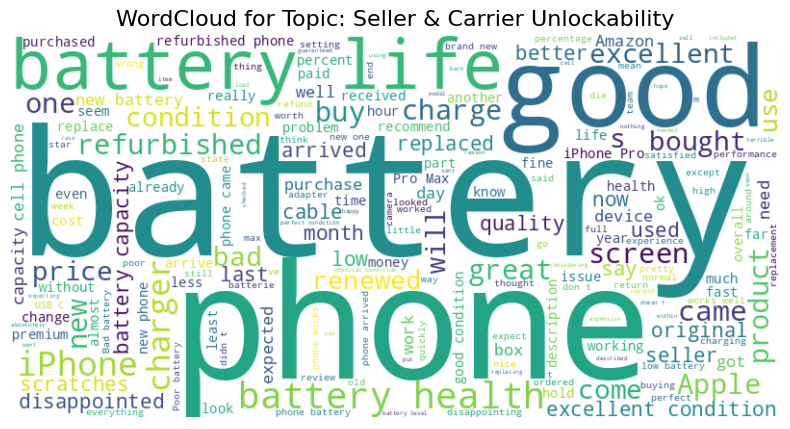

In [42]:
!pip install wordcloud --quiet
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Group by final topic
topics = new_df['final_topic'].unique()

for topic in topics:
    text = ' '.join(new_df[new_df['final_topic'] == topic]['full_review_text'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Topic: {topic}", fontsize=16)
    plt.show()

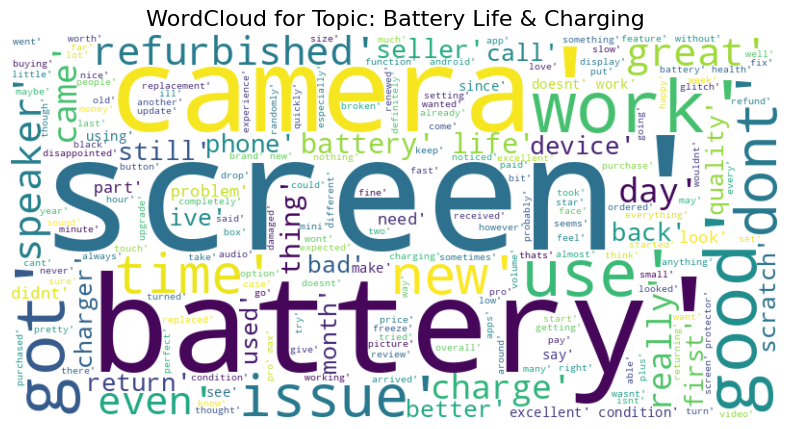

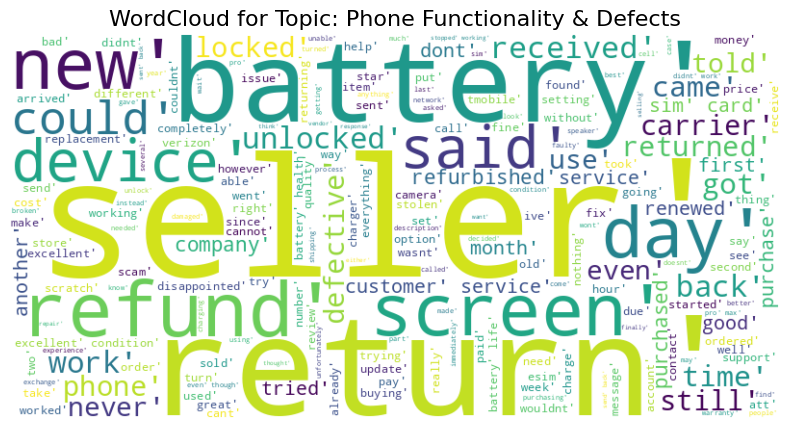

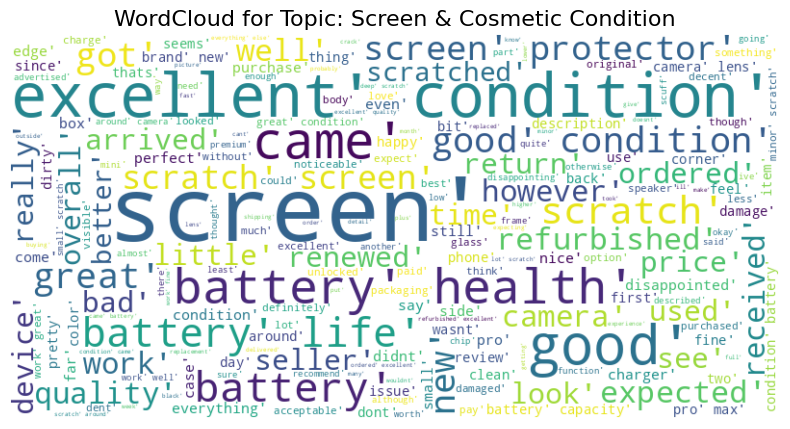

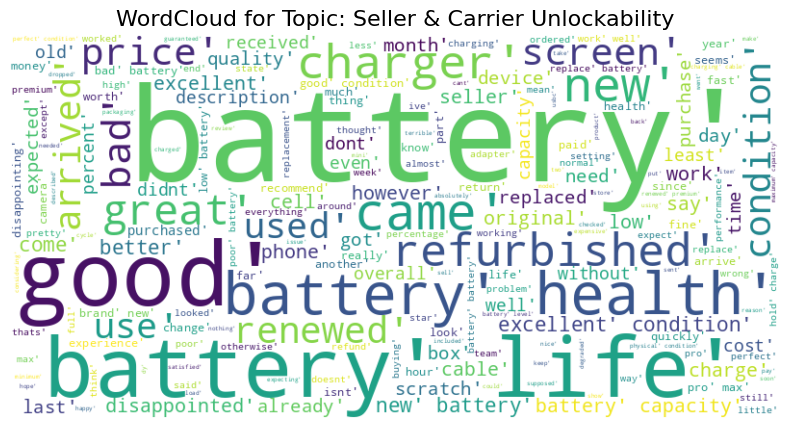

In [43]:
topics = new_df['final_topic'].unique()

for topic in topics:
    text = ' '.join(new_df[new_df['final_topic'] == topic]['processed_text'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Topic: {topic}", fontsize=16)
    plt.show()

/tmp/ipython-input-44-223018987.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  timeline_df[timeline_df['final_topic'] == topic].resample('M', on='date').size().plot(label=topic)
/tmp/ipython-input-44-223018987.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  timeline_df[timeline_df['final_topic'] == topic].resample('M', on='date').size().plot(label=topic)
/tmp/ipython-input-44-223018987.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  timeline_df[timeline_df['final_topic'] == topic].resample('M', on='date').size().plot(label=topic)
/tmp/ipython-input-44-223018987.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  timeline_df[timeline_df['final_topic'] == topic].resample('M', on='date').size().plot(label=topic)


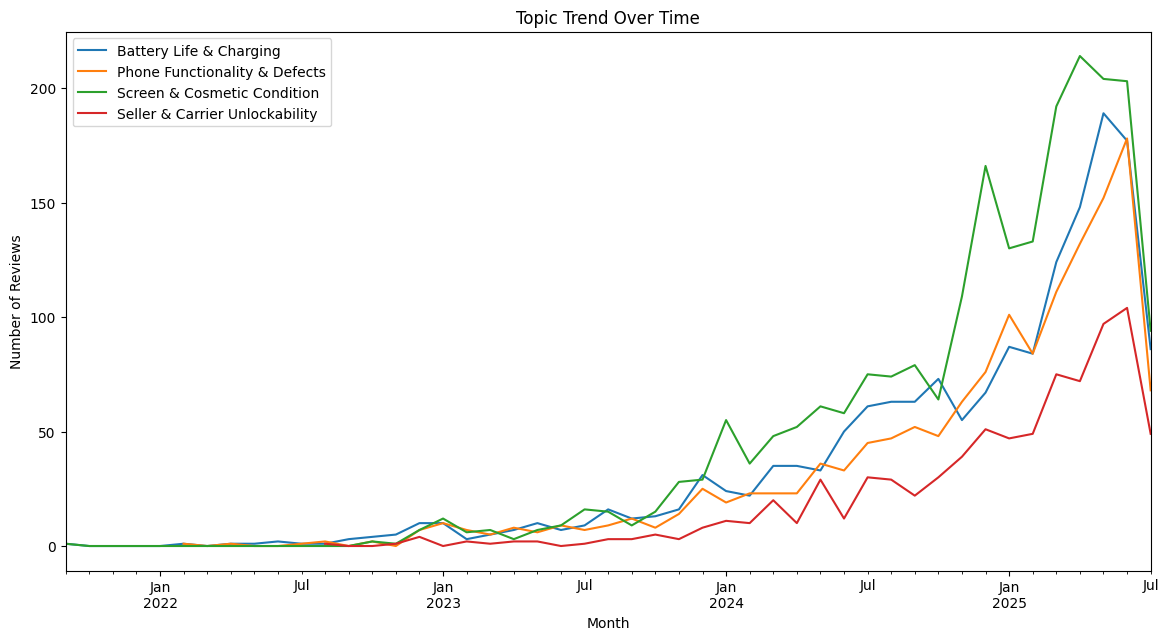

In [44]:
# Ensure 'date' is datetime
new_df['date'] = pd.to_datetime(new_df['date'], errors='coerce')

# Drop null dates
timeline_df = new_df.dropna(subset=['date'])

# Plot number of reviews per topic over time
plt.figure(figsize=(14, 7))
for topic in new_df['final_topic'].unique():
    timeline_df[timeline_df['final_topic'] == topic].resample('M', on='date').size().plot(label=topic)

plt.title("Topic Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.legend()
plt.show()

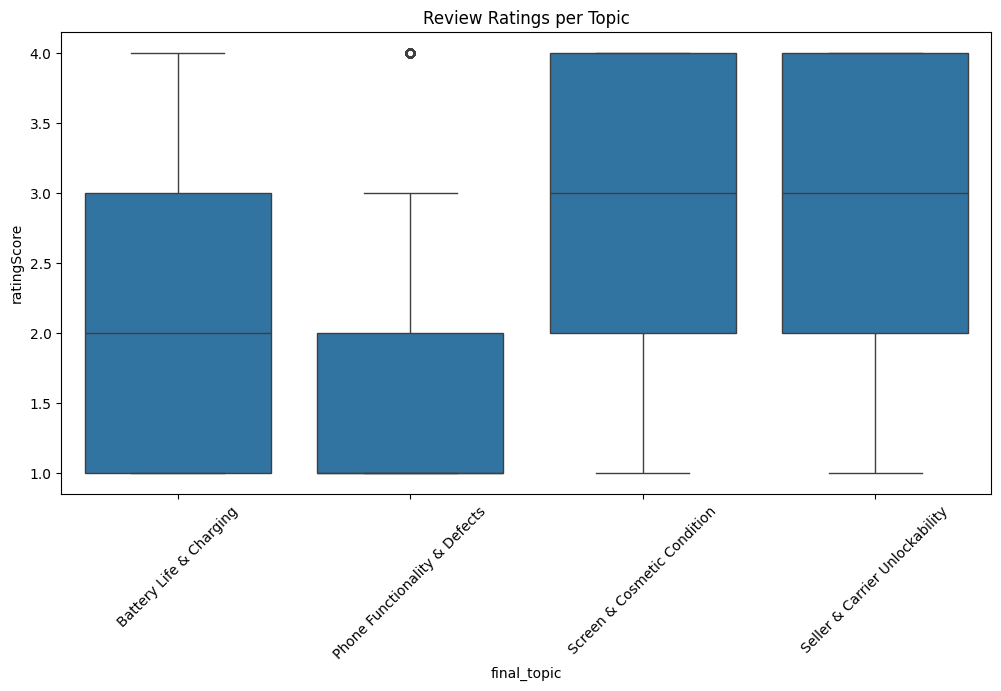

In [45]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=new_df, x='final_topic', y='ratingScore')
plt.title("Review Ratings per Topic")
plt.xticks(rotation=45)
plt.show()


In [46]:
new_df.columns

Index(['model', 'ratingScore', 'reviewTitle', 'reviewDescription', 'date',
       'full_review_text', 'sentiment_score', 'processed_text',
       'processed_text_bigrams', 'topic_4', 'topic_6', 'topic_2', 'topic_3',
       'topic_5', 'final_topic'],
      dtype='object')

In [47]:
new_df.head()

,model,ratingScore,reviewTitle,reviewDescription,date,full_review_text,sentiment_score,processed_text,processed_text_bigrams,topic_4,topic_6,topic_2,topic_3,topic_5,final_topic
0,iphone 12,1,Defective Phone,I never leave Amazon reviews but I felt it was...,2025-05-30,Defective Phone. I never leave Amazon reviews ...,-1,"[defective, never, leave, review, felt, necess...","[defective, never, leave, review, felt, necess...",3,3,1,0,3,Battery Life & Charging
1,iphone 12,1,POOR CUSTOMER SERVICE AND DEFECTIVE PHONE WITH...,I recently purchased Renewed iphone 12 from SY...,2025-02-10,POOR CUSTOMER SERVICE AND DEFECTIVE PHONE WITH...,-1,"[poor, customer, service, defective, without, ...","[poor_customer, service, defective, without, r...",1,1,1,1,3,Phone Functionality & Defects
2,iphone 12,1,"Selling a damaged iPhone as ""in excellent cond...",This is the 6th USED iPhone that I have purcha...,2025-06-21,"Selling a damaged iPhone as ""in excellent cond...",-1,"[selling, damaged, excellent, condition, used,...","[selling, damaged, excellent_condition, used, ...",2,2,0,2,2,Screen & Cosmetic Condition
3,iphone 12,1,Not what I expected for “Good” quality.,I ordered this iPhone when my old phone broke....,2024-11-15,Not what I expected for “Good” quality.. I ord...,-1,"[expected, good, quality, ordered, old, broke,...","[expected, good, quality, ordered, old, broke,...",2,2,0,2,2,Screen & Cosmetic Condition
4,iphone 12,1,Horrible glitches horrible customer service,Please do not get a phone from this company. T...,2025-06-19,Horrible glitches horrible customer service. P...,-1,"[horrible, glitch, horrible, customer, service...","[horrible, glitch, horrible, customer_service,...",1,3,1,1,3,Phone Functionality & Defects


In [48]:
count_non_negative = (new_df['sentiment_score'] != -1).sum()
print(f"Number of entries where sentiment_score is not -1: {count_non_negative}")

Number of entries where sentiment_score is not -1: 16


In [49]:
sentiment_counts = new_df['sentiment_score'].value_counts().sort_index()

print("Sentiment Summary")
print(f"Negative (-1): {sentiment_counts.get(-1, 0)}")
print(f"Neutral (0):   {sentiment_counts.get(0, 0)}")
print(f"Positive (1):  {sentiment_counts.get(1, 0)}")


Sentiment Summary
Negative (-1): 6113
Neutral (0):   16
Positive (1):  0


In [50]:
sentiment_counts = new_df['sentiment_score'].value_counts().sort_index()

print("Sentiment Summary")
print(f"Negative (-1): {sentiment_counts.get(-1, 0)}")
print(f"Neutral (0):   {sentiment_counts.get(0, 0)}")
print(f"Positive (1):  {sentiment_counts.get(1, 0)}")


Sentiment Summary
Negative (-1): 6113
Neutral (0):   16
Positive (1):  0


In [52]:
columns_for_dashboard = [
    'model',
    'ratingScore',
    'date',
    'full_review_text',
    'sentiment_score',
    'final_topic'
]

In [53]:
dashboard_df = new_df[columns_for_dashboard].copy()

dashboard_df.to_csv('dashboard_ready_data.csv', index=False)
print("done'dashboard_ready_data.csv'")

done'dashboard_ready_data.csv'


In [55]:
dashboard_df.to_excel("dashboard_ready_data.xlsx", index=False)